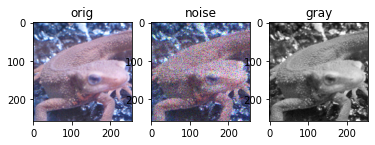

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

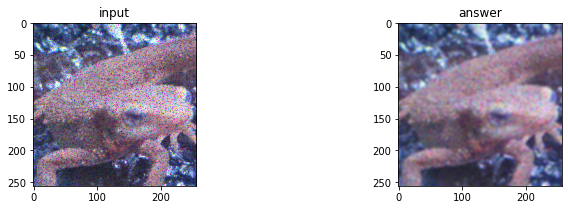

In [3]:
# Q11
img_smoth = cv2.blur(img_noise, (5,5))

plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

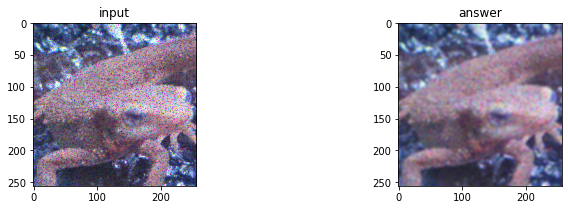

In [4]:
k = np.full((5,5),1/25)
img_smoth2 = cv2.filter2D(img_noise, -1, k)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth2)
plt.show()

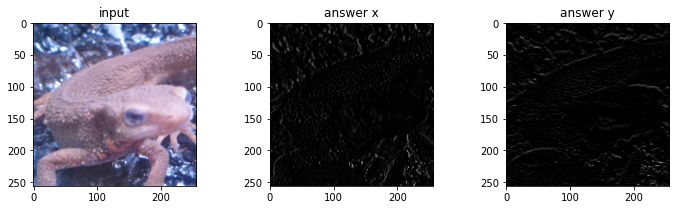

In [5]:
# Q14
kx = np.array([[0,0,0],[-1,1,0],[0,0,0]])
ky = np.array([[0,-1,0],[0,1,0],[0,0,0]])
ax = cv2.filter2D(img_gray, -1, kx)
ay = cv2.filter2D(img_gray, -1, ky)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.show()

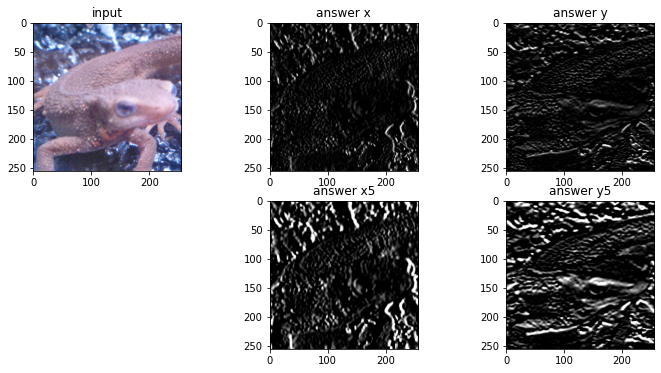

In [6]:
# Q15
def prewitt(size = (3,3), mode='x'):
    k = np.zeros(size)
    if mode=='x':
        k[:, 0] = 1
        k[:, -1] = -1
    else:
        k[0, :] = 1
        k[-1, :] = -1
    return k

ax = cv2.filter2D(img_gray, -1, prewitt(mode='x'))
ay = cv2.filter2D(img_gray, -1, prewitt(mode='y'))
ax5 = cv2.filter2D(img_gray, -1, prewitt(size=(5,5),mode='x'))
ay5 = cv2.filter2D(img_gray, -1, prewitt(size=(5,5),mode='y'))

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(2, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(2, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.subplot(2, 3, 5); plt.title('answer x5'); plt.imshow(ax5, cmap='gray')
plt.subplot(2, 3, 6); plt.title('answer y5'); plt.imshow(ay5, cmap='gray')
plt.show()



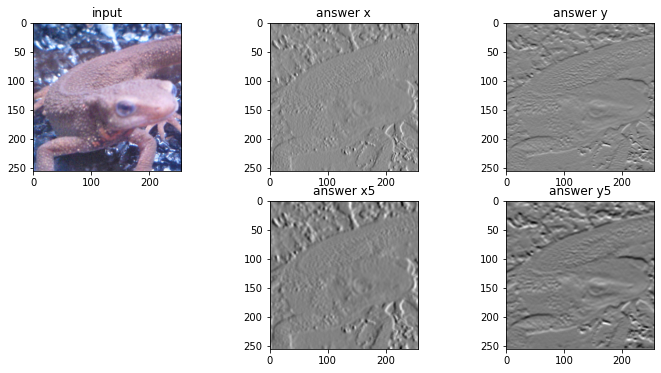

In [7]:
# Q16
def filter_sobel(size=(3,3), mode='x'):
    k = np.zeros(size)
    if mode=='x':
        k[:, 0] = 1
        k[:, -1] = -1
        k[(size[0]+1)//2, 0] = 2
        k[(size[0]+1)//2, -1] = -2
    else:
        k[0, :] = 1
        k[-1, :] = -1
        k[0, (size[1]+1)//2] = 2
        k[-1, (size[1]+1)//2] = -2
    return k

def norm(d):
    d -= ax.min()
    d /= ax.max()
    return d

ax = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(mode='x')))
ay = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(mode='y')))
ax5 = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(size=(5,5),mode='x')))
ay5 = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(size=(5,5),mode='y')))

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(2, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(2, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.subplot(2, 3, 5); plt.title('answer x5'); plt.imshow(ax5, cmap='gray')
plt.subplot(2, 3, 6); plt.title('answer y5'); plt.imshow(ay5, cmap='gray')
plt.show()

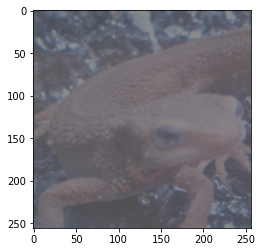

In [8]:
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
plt.imshow(img_dark); plt.show()

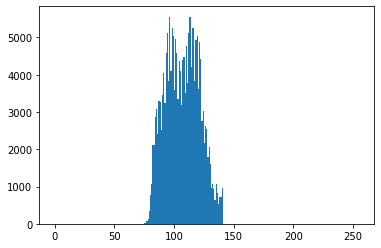

In [9]:
plt.hist(img_dark.ravel(), bins=255, range=(0,255))
plt.show()

Text(0.5, 1.0, 'light gray')

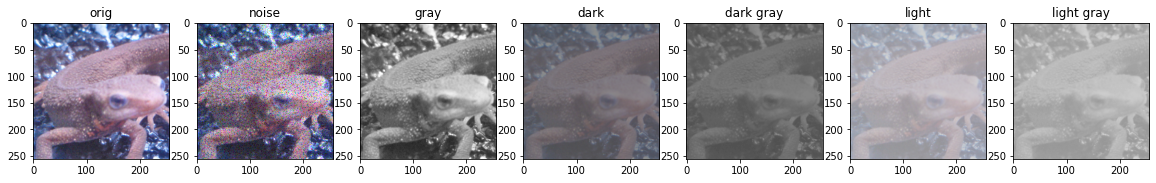

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_light.png')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 4))
plt.subplot(1, 7, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 7, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 7, 3); plt.imshow(img_gray, cmap='gray', norm=Normalize(vmin=0, vmax=255)); plt.title('gray')
plt.subplot(1, 7, 4); plt.imshow(img_dark);  plt.title('dark')
plt.subplot(1, 7, 5); plt.imshow(img_dark_gray, cmap='gray',norm=Normalize(vmin=0, vmax=255)); plt.title('dark gray')
plt.subplot(1, 7, 6); plt.imshow(img_light);  plt.title('light')
plt.subplot(1, 7, 7); plt.imshow(img_light_gray, cmap='gray',norm=Normalize(vmin=0, vmax=255)); plt.title('light gray')

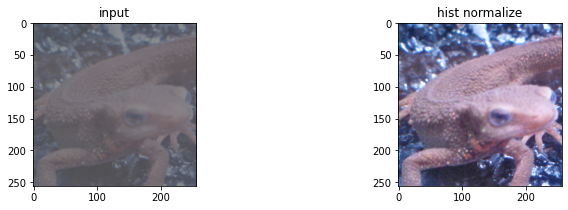

In [11]:
def hist_normalize(img, a, b):
    min,max = img.min(), img.max()
    out = (img-min) / (max-min) * (b-a) + a
    out = np.clip(out, a,b).astype(np.uint8)
    return out

img_dark_hist_norm = hist_normalize(img_dark, a=0, b=255) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_dark_hist_norm)
plt.show()

106.82347615559895 14.010876302431814


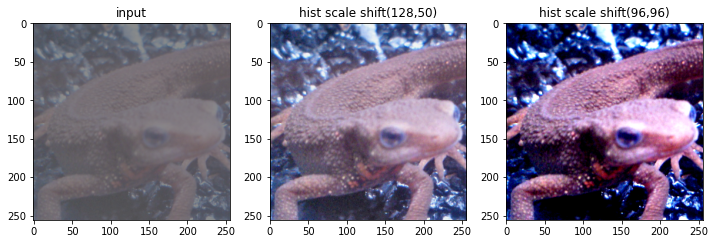

In [12]:
def hist_scaleshift(img, m, s):
    m0, s0 = img.mean(), img.std()
    out = img.astype(np.float32)
    out = (img - m0) / s0 * s + m
    return np.clip(out, 0,255).astype(np.uint8)

img_dark_hist_scaleshift = hist_scaleshift(img_dark, m=128, s=50)
img_dark_hist_scaleshift2 = hist_scaleshift(img_dark, m=96, s=96)

print(img_dark.mean(), img_dark.std())
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 3, 2); plt.title('hist scale shift(128,50)'); plt.imshow(img_dark_hist_scaleshift)
plt.subplot(1, 3, 3); plt.title('hist scale shift(96,96)'); plt.imshow(img_dark_hist_scaleshift2)
plt.show()

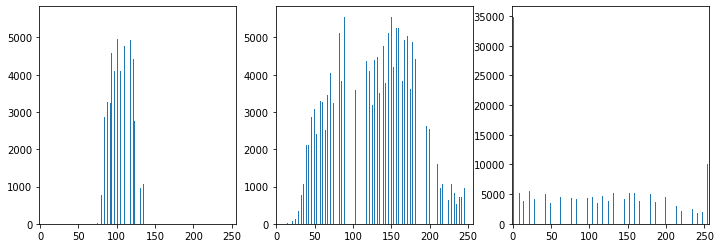

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([-1, 256])
plt.subplot(1, 3, 2); plt.hist(img_dark_hist_scaleshift.ravel(), bins=255); plt.xlim([-1, 256])
plt.subplot(1, 3, 3); plt.hist(img_dark_hist_scaleshift2.ravel(), bins=255); plt.xlim([-1, 256])
plt.show()

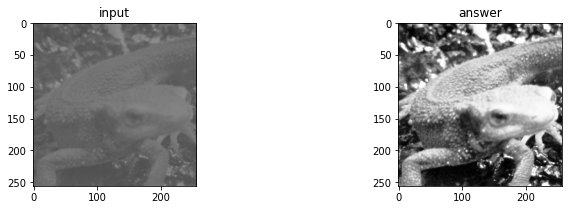

In [14]:
def hist_equ(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    xmax=255
    h = 0
    for i in range(0, 256):
        h += (img == i).sum()
        out[img == i] = xmax / s * h
    return np.clip(out, 0, 255).astype(np.uint8)

img_dark_gray_hist_equ = hist_equ(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark_gray, cmap='gray',norm=Normalize(vmin=0, vmax=255))
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_dark_gray_hist_equ, cmap='gray', norm=Normalize(vmin=0, vmax=255))
plt.show()

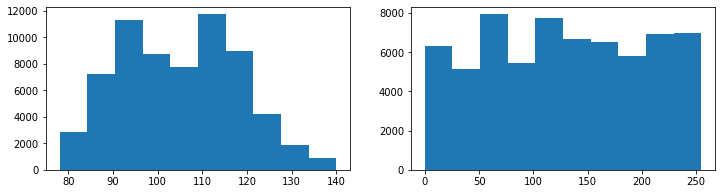

In [15]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.hist(img_dark_gray.ravel())
plt.subplot(1,2,2); plt.hist(img_dark_gray_hist_equ.ravel())
plt.show()

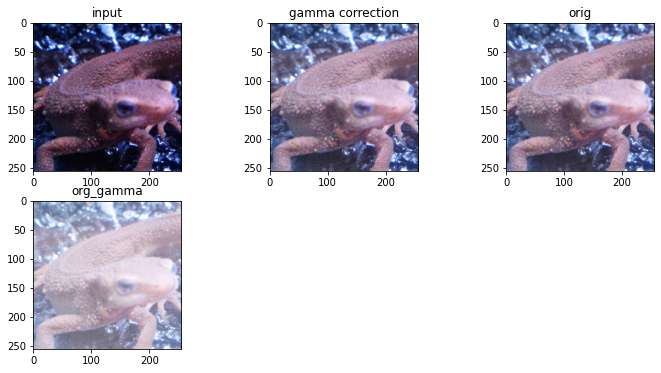

In [16]:
def gamma_corr(img, c, g = 2.2):
    out = (img.astype(np.float32)/255 / c) ** (1 / g) * 255
    return np.clip(out, 0, 255).astype(np.uint8)

img_gamma = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_gamma.png')
img_gamma_corr = gamma_corr(img_gamma, c=1, g=2.2)

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1); plt.title('input'); plt.imshow(img_gamma)
plt.subplot(2, 3, 2); plt.title('gamma correction'); plt.imshow(img_gamma_corr)
plt.subplot(2, 3, 3); plt.title('orig'); plt.imshow(img_orig)
plt.subplot(2,3,4); plt.title('org_gamma'); plt.imshow(gamma_corr(img_orig, c=1, g=2.2))
plt.show()

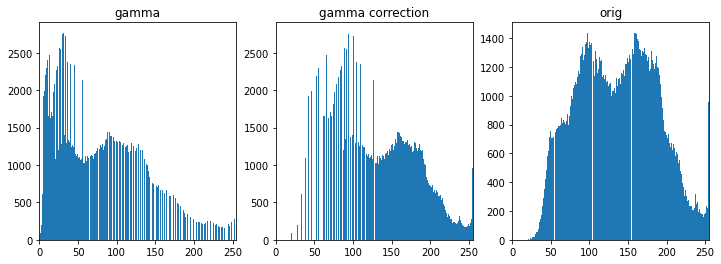

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.hist(img_gamma.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma')
plt.subplot(1, 3, 2); plt.hist(img_gamma_corr.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma correction')
plt.subplot(1, 3, 3); plt.hist(img_orig.ravel(), bins=255); plt.xlim([0, 255]); plt.title('orig')
plt.show()

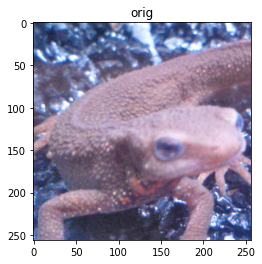

In [18]:
def nn_inter(img, a, b):
    out_h = int(img.shape[0] * a)
    out_w = int(img.shape[1] * b)
    out = np.zeros([out_h, out_w, img.shape[2]], dtype=np.uint8)
    xs, ys = np.meshgrid(range(out_h), range(out_w))
    out[ys, xs] = img[np.round(ys / a).astype(int), np.round(xs / b).astype(int)]
    return out
plt.imshow(img_orig); plt.title('orig'); plt.show()

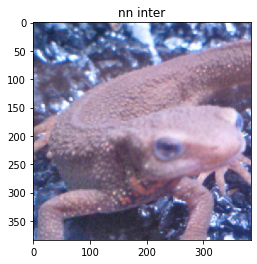

In [19]:
img_nn = nn_inter(img_orig, a=1.5, b=1.5)
plt.imshow(img_nn); plt.title('nn inter'); plt.show()

In [45]:
def bilinear_inter(img, a, b):
    h, w, c = img.shape
    out_h = int(h*a)
    out_w = int(w*b)
    xs, ys = np.meshgrid(range(out_w), range(out_h))

    _xs = np.floor(xs/b).astype(int)
    _ys = np.floor(ys/a).astype(int)

    dx = xs / b - _xs
    dy = ys / a - _ys

    dx = np.repeat(np.expand_dims(dx, axis=-1), c, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), c, axis=-1)

    _xs1p = np.minimum(_xs + 1, w-1)
    _ys1p = np.minimum(_ys + 1, h-1)

    out = (1-dx) * (1-dy) * img[_ys, _xs] + dx * (1-dy) * img[_ys, _xs1p] + \
        (1-dx) * dy * img[_ys1p, _xs] + dx * dy * img[_ys1p, _xs1p]
    return np.clip(out, 0, 255).astype(np.uint8)

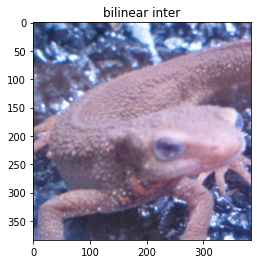

In [46]:
img_bl = bilinear_inter(img_orig, a=1.5, b=1.5)
plt.imshow(img_bl); plt.title('bilinear inter'); plt.show()